In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import arff
import missingno as msno
from sklearn.preprocessing import Imputer
#import fancyimpute
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier



In [2]:
#pip install missingno

In [3]:
import os
os.getcwd()

'C:\\Users\\Saibaba\\Desktop\\Interview questions\\Datasets\\Polish Bankruptcy predition'

In [4]:
def load_raw_data():
    n=5
    return [arff.loadarff('C:\\Users\\Saibaba\\Desktop\\Interview questions\\Datasets\\Polish Bankruptcy predition\\'+ str(i+1) + 'year.arff') for i in range(n)]
def convert_in_df():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_raw_data()]

def set_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

dataframes = convert_in_df()

set_headers(dataframes)    

dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [5]:
dataframes[0].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,8.855693e+03,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,7.247527e+04,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-8.004700e+05,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,9.712000e+01,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,1.604800e+03,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,5.955900e+03,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,4.398400e+06,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000


In [6]:
dataframes[0]['Y']

0       b'0'
1       b'0'
2       b'0'
3       b'0'
4       b'0'
5       b'0'
6       b'0'
7       b'0'
8       b'0'
9       b'0'
10      b'0'
11      b'0'
12      b'0'
13      b'0'
14      b'0'
15      b'0'
16      b'0'
17      b'0'
18      b'0'
19      b'0'
20      b'0'
21      b'0'
22      b'0'
23      b'0'
24      b'0'
25      b'0'
26      b'0'
27      b'0'
28      b'0'
29      b'0'
        ... 
6997    b'1'
6998    b'1'
6999    b'1'
7000    b'1'
7001    b'1'
7002    b'1'
7003    b'1'
7004    b'1'
7005    b'1'
7006    b'1'
7007    b'1'
7008    b'1'
7009    b'1'
7010    b'1'
7011    b'1'
7012    b'1'
7013    b'1'
7014    b'1'
7015    b'1'
7016    b'1'
7017    b'1'
7018    b'1'
7019    b'1'
7020    b'1'
7021    b'1'
7022    b'1'
7023    b'1'
7024    b'1'
7025    b'1'
7026    b'1'
Name: Y, Length: 7027, dtype: object

Checking the data shape across all the five years

In [7]:
n=5
for i in range(n):
    print(dataframes[i].shape)

(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


Checking null values across all the dataframes

In [8]:
n=5
for i in range(n):
    print(dataframes[i].isnull().sum().sort_values(ascending=False).head(5))

X37    2740
X21    1622
X27     311
X60     135
X45     134
dtype: int64
X37    4518
X21    3164
X27     706
X60     543
X45     541
dtype: int64
X37    4736
X21     807
X27     715
X60     592
X45     591
dtype: int64
X37    4442
X27     641
X60     614
X45     613
X28     231
dtype: int64
X37    2548
X27     391
X60     268
X45     268
X24     135
dtype: int64


Missing values are redudantly occuring in the following attributes 37,27,60,45

In [9]:
for i in range(n):
        col = getattr(dataframes[i], 'Y')
        dataframes[i]['Y'] = col.astype(int)
        

In [10]:
for i in range(n):
        index = 1
        while(index<=63):
            colname = dataframes[i].columns[index]
            col = getattr(dataframes[i], colname)
            dataframes[i][colname] = col.astype(float)
            index+=1

In [11]:
dataframes[0].describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
count,7024.000000,7024.000000,7024.000000,6997.000000,7.019000e+03,7024.000000,7024.000000,7002.000000,7026.000000,7024.000000,...,7.027000e+03,7026.000000,7.027000e+03,7026.000000,6.892000e+03,7005.000000,7.027000e+03,6997.000000,6993.000000,7027.000000
mean,0.034660,0.560215,0.119969,2.629143,-2.631672e+02,0.059712,0.313876,2.623996,5.552855,1.825832,...,-1.577367e+02,0.193243,1.587409e+02,0.277829,4.328830e+02,15.642228,4.763202e+03,8.126852,208.731950,0.038566
std,4.565504,5.350084,5.275459,13.257356,3.707460e+04,6.051113,8.353274,18.708327,101.995448,33.836452,...,1.322125e+04,4.344046,1.322124e+04,6.339149,2.612802e+04,261.554534,3.107835e+05,19.996419,5140.708804,0.192571
min,-256.890000,-72.162000,-440.500000,0.000000,-2.722100e+06,-397.890000,-189.560000,-141.410000,0.000005,-440.550000,...,-1.108300e+06,-315.370000,-4.194000e-03,-327.970000,4.700000e-05,0.000016,0.000000e+00,0.000015,0.000010,0.000000
25%,0.021182,0.296678,0.026968,1.063100,-4.449800e+01,0.000000,0.028023,0.445710,1.037225,0.300785,...,2.031450e-02,0.056772,8.647650e-01,0.000000,5.923950e+00,4.829000,4.322250e+01,3.425400,2.538600,0.000000
50%,0.075802,0.482960,0.181275,1.502000,-5.373900e+00,0.000000,0.090109,1.015100,1.205750,0.492235,...,6.338200e-02,0.175745,9.388100e-01,0.028438,1.004050e+01,7.033700,6.850900e+01,5.303200,4.637700,0.000000
75%,0.160268,0.680233,0.362548,2.460700,3.777050e+01,0.146660,0.188667,2.267675,2.132975,0.675677,...,1.376950e-01,0.351922,9.820150e-01,0.273867,2.013900e+01,10.703000,1.063350e+02,8.357900,9.782200,0.000000
max,94.280000,441.500000,1.000000,1017.800000,9.909000e+05,303.670000,453.770000,1452.200000,3876.100000,1099.500000,...,1.000000e+00,126.670000,1.108300e+06,119.580000,2.137800e+06,21110.000000,2.501600e+07,1042.200000,294770.000000,1.000000


In [12]:
n=5
for i in range(n):
    print(dataframes[i]['Y'].value_counts())

0    6756
1     271
Name: Y, dtype: int64
0    9773
1     400
Name: Y, dtype: int64
0    10008
1      495
Name: Y, dtype: int64
0    9277
1     515
Name: Y, dtype: int64
0    5500
1     410
Name: Y, dtype: int64


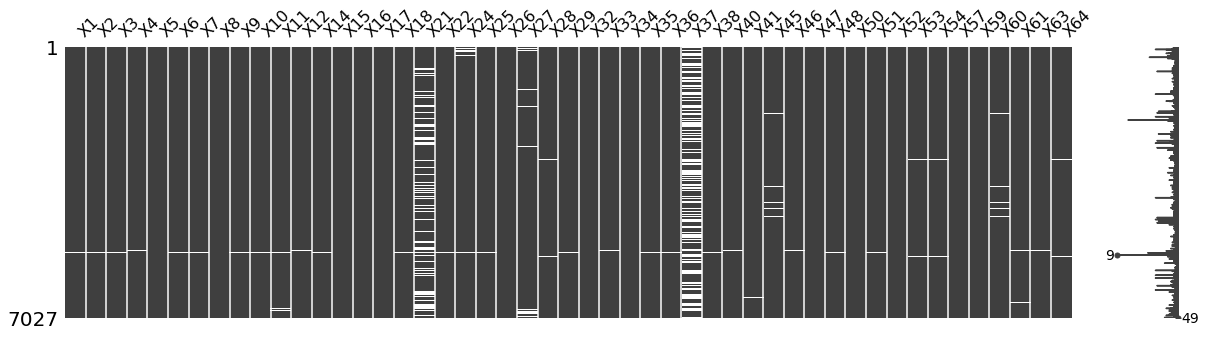

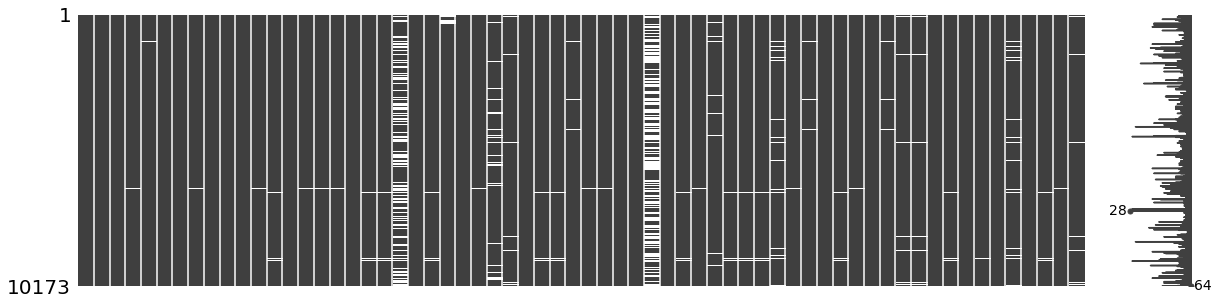

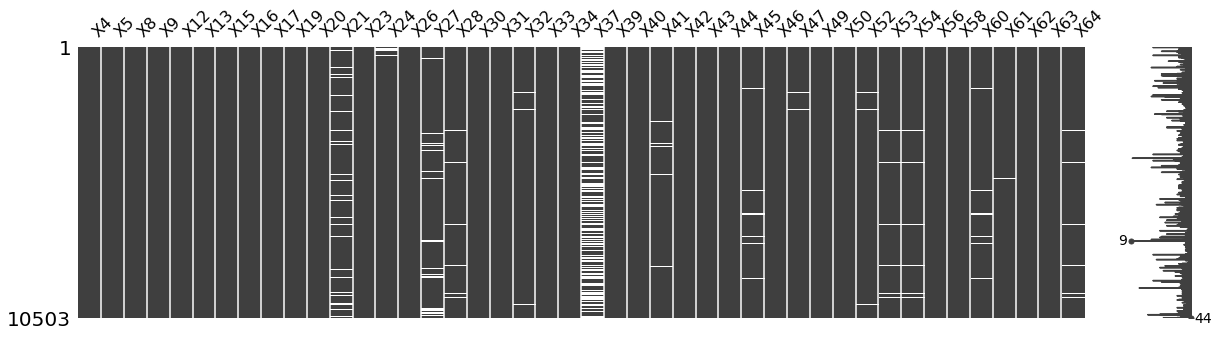

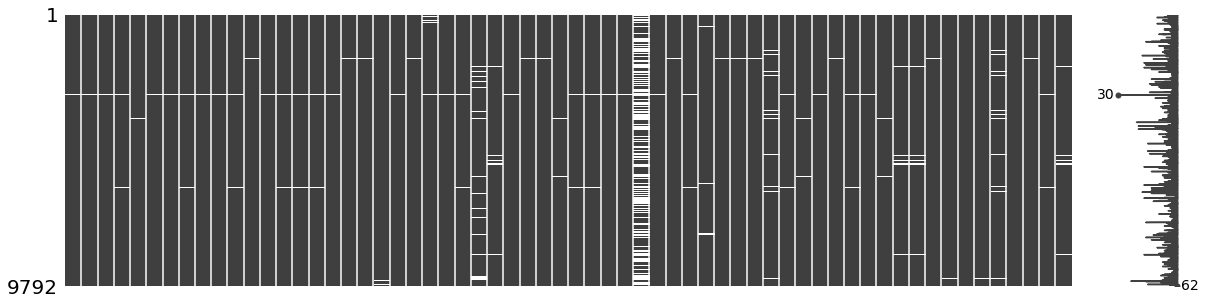

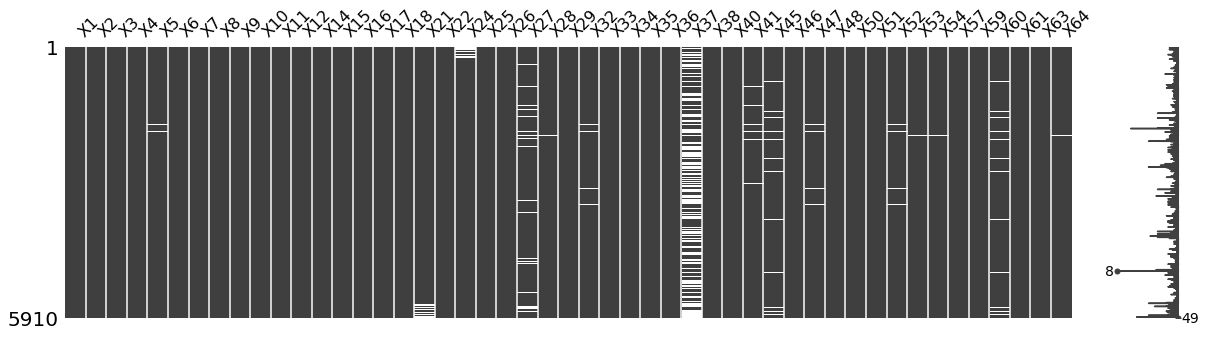

In [13]:
for i in range(5):
        missing_df_i = dataframes[i].columns[dataframes[i].isnull().any()].tolist()
        msno.matrix(dataframes[i][missing_df_i], figsize=(20,5))

From the sparsity matrix, we see attribute 37 and 21 have lots of missing values. Inorder to preseve the data we use imputation method and not eliminate it

Median imputation

In [14]:
imputer = Imputer(missing_values=np.nan, strategy='median', axis=0)
median_imputed_dfs = [pd.DataFrame(imputer.fit_transform(df)) for df in dataframes]
for i in range(len(dataframes)):
        median_imputed_dfs[i].columns = dataframes[i].columns  

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
median_imputed_dfs[0].head()
    

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


knn imputation

In [16]:
consolidatedDfs=pd.DataFrame(index=median_imputed_dfs[0].index,columns=median_imputed_dfs[0].columns)
#for i in range(5):
consolidatedDfs=pd.concat([median_imputed_dfs[0],median_imputed_dfs[1],median_imputed_dfs[2],median_imputed_dfs[3],median_imputed_dfs[4]])

In [17]:
consolidatedDfs.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [18]:
consolidatedDfs.shape

(43405, 65)

In [19]:
print(consolidatedDfs.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43405 entries, 0 to 5909
Data columns (total 65 columns):
X1     43405 non-null float64
X2     43405 non-null float64
X3     43405 non-null float64
X4     43405 non-null float64
X5     43405 non-null float64
X6     43405 non-null float64
X7     43405 non-null float64
X8     43405 non-null float64
X9     43405 non-null float64
X10    43405 non-null float64
X11    43405 non-null float64
X12    43405 non-null float64
X13    43405 non-null float64
X14    43405 non-null float64
X15    43405 non-null float64
X16    43405 non-null float64
X17    43405 non-null float64
X18    43405 non-null float64
X19    43405 non-null float64
X20    43405 non-null float64
X21    43405 non-null float64
X22    43405 non-null float64
X23    43405 non-null float64
X24    43405 non-null float64
X25    43405 non-null float64
X26    43405 non-null float64
X27    43405 non-null float64
X28    43405 non-null float64
X29    43405 non-null float64
X30    43405 non-null 

We have now filled all the missing values and combined all the files

Now we have to balnce the data before modelling

In [20]:
consolidatedDfs['Y'].value_counts()

0.0    41314
1.0     2091
Name: Y, dtype: int64

For this purpose we use SMOTE balance.

In [21]:
X = consolidatedDfs.iloc[:,:-1]
y = consolidatedDfs.iloc[:,64]

# splitting the set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
#y_test

In [22]:
# X = mean_imputed_dfs[0].iloc[:,:-1]
# y = mean_imputed_dfs[0].iloc[:,64]

# # splitting the set
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
# #y_test

In [23]:
X_train.shape

(34724, 64)

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
from imblearn.over_sampling import SMOTE

In [25]:

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

# Modelling

# Logistic Regression

In [26]:
threshold = 1e-6

clf1 = LogisticRegression(penalty = 'l1')
clf2 = LogisticRegression(penalty = 'l2')

In [27]:
model_list = (clf1, clf2)

for clf in model_list:
    clf.fit(X_train, y_train)
    feature_weight = clf.coef_
    print("The validation score of model",clf.score(X_test,y_test))
    print("The number of selected feature of model",(np.sum(abs(feature_weight) > threshold)))

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The validation score of model 0.7469185577698422
The number of selected feature of model 60


C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The validation score of model 0.7836654763276121
The number of selected feature of model 61


C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


We see that l2 penality giver higher accuracy with 78 percentage

In [28]:
Classifier = []
Accuracy=[]
RMSE =[]
Train_Score=[]
Test_Score=[]
Precision=[]
Recall=[]


In [29]:
def MLAlgo(X_train,y_train,X_test,y_test):
    from sklearn.linear_model import LogisticRegression
    LRclassifier = LogisticRegression(random_state = 0)
    LRclassifier.fit(X_train,y_train)
    y_pred = LRclassifier.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Logistic Regression")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(LRclassifier.score(X_train,y_train))
    Test_Score.append(LRclassifier.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.tree import DecisionTreeClassifier
    DTclassifier = DecisionTreeClassifier(criterion = 'gini',random_state = 0)
    DTclassifier.fit(X_train,y_train)
    y_pred = DTclassifier.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Decision Tree")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(DTclassifier.score(X_train,y_train))
    Test_Score.append(DTclassifier.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.ensemble import RandomForestClassifier
    rclf = RandomForestClassifier(n_estimators= 100)
    rclf.fit(X_train,y_train)
    y_pred = rclf.predict(X_test)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Random Forest")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(rclf.score(X_train,y_train))
    Test_Score.append(rclf.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.neighbors import KNeighborsClassifier
    kclassifier = KNeighborsClassifier(n_neighbors= 5)
    kclassifier.fit(X_train,y_train)
    y_pred = kclassifier.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("KNN")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(kclassifier.score(X_train,y_train))
    Test_Score.append(kclassifier.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Naive Bayes")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(model.score(X_train,y_train))
    Test_Score.append(model.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.ensemble import BaggingClassifier
    model = BaggingClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Bagging")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(model.score(X_train,y_train))
    Test_Score.append(model.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.ensemble import ExtraTreesClassifier 
    model = ExtraTreesClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Extra Tree")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(model.score(X_train,y_train))
    Test_Score.append(model.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.ensemble import AdaBoostClassifier
    ABclassifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
    ABclassifier.fit(X_train, y_train)
    y_pred = ABclassifier.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Adaboost")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(ABclassifier.score(X_train,y_train))
    Test_Score.append(ABclassifier.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from sklearn.ensemble import GradientBoostingClassifier
    gb_clf2 = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0)
    gb_clf2.fit(X_train, y_train)
    y_pred = gb_clf2.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("Gradient Boost")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(gb_clf2.score(X_train,y_train))
    Test_Score.append(gb_clf2.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))
    from xgboost import XGBClassifier
    X_train = np.asmatrix(X_train)
    X_test = np.asmatrix(X_test)
    xgbclassifier = XGBClassifier()
    xgbclassifier.fit(X_train, y_train)
    y_pred = xgbclassifier.predict(X_test)
    cm = confusion_matrix(y_true=y_test,y_pred=y_pred)
    #print('Confusion Matrix \n',cm)
    Classifier.append("XG Boost")
    Accuracy.append(accuracy_score(y_test,y_pred))
    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rms)
    Train_Score.append(xgbclassifier.score(X_train,y_train))
    Test_Score.append(xgbclassifier.score(X_test,y_test))
    Precision.append(precision_score(y_test,y_pred,average='macro'))
    Recall.append(recall_score(y_test,y_pred,average='macro'))


In [30]:
MLAlgo(X_train,y_train,X_test,y_test)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [31]:
print(Classifier)
print(Accuracy)
print(RMSE)
# Train_Score=[]
# Test_Score=[]
# Precision=[]
# Recall=[]
# )

['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'Bagging', 'Extra Tree', 'Adaboost', 'Gradient Boost', 'XG Boost']
[0.7836654763276121, 0.8993203547978343, 0.9523096417463426, 0.7479553046884, 0.07556733095265522, 0.9395230964174635, 0.9268517451906463, 0.8664900357101717, 0.7588987443842875, 0.878124640018431]
[0.465117752480367, 0.31730055972557886, 0.21838122230095108, 0.5020405315426236, 0.9614742165275909, 0.24592052289822533, 0.2704593403995391, 0.36539015352062837, 0.4910206264666612, 0.34910651667015463]


In [32]:
scores = pd.DataFrame()  
scores['Classifier']=Classifier
scores['Accuracy']=Accuracy
scores['RMSE']=RMSE
scores['Train_Score']=Train_Score
scores['Test_Score']=Test_Score
scores['Precision']=Precision
scores['Recall']=Recall
scores

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
0,Logistic Regression,0.783665,0.465118,0.615529,0.783665,0.534000,0.616694
1,Decision Tree,0.899320,0.317301,1.000000,0.899320,0.615565,0.721613
2,Random Forest,0.952310,0.218381,1.000000,0.952310,0.752770,0.750599
3,KNN,0.747955,0.502041,0.902945,0.747955,0.527091,0.604322
4,Naive Bayes,0.075567,0.961474,0.506485,0.075567,0.491006,0.494803
5,Bagging,0.939523,0.245921,0.998912,0.939523,0.698830,0.743864
6,Extra Tree,0.926852,0.270459,1.000000,0.926852,0.620479,0.620220
7,Adaboost,0.866490,0.365390,0.889339,0.866490,0.593147,0.736513
8,Gradient Boost,0.758899,0.491021,0.788701,0.758899,0.547184,0.684131
9,XG Boost,0.878125,0.349107,0.901736,0.878125,0.608790,0.765177


In [33]:
scores.sort_values(by='Accuracy',axis=0,ascending=False)

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
2,Random Forest,0.952310,0.218381,1.000000,0.952310,0.752770,0.750599
5,Bagging,0.939523,0.245921,0.998912,0.939523,0.698830,0.743864
6,Extra Tree,0.926852,0.270459,1.000000,0.926852,0.620479,0.620220
1,Decision Tree,0.899320,0.317301,1.000000,0.899320,0.615565,0.721613
9,XG Boost,0.878125,0.349107,0.901736,0.878125,0.608790,0.765177
7,Adaboost,0.866490,0.365390,0.889339,0.866490,0.593147,0.736513
0,Logistic Regression,0.783665,0.465118,0.615529,0.783665,0.534000,0.616694
8,Gradient Boost,0.758899,0.491021,0.788701,0.758899,0.547184,0.684131
3,KNN,0.747955,0.502041,0.902945,0.747955,0.527091,0.604322
4,Naive Bayes,0.075567,0.961474,0.506485,0.075567,0.491006,0.494803


C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature: 0, Score: 0.01051
Feature: 1, Score: 0.00891
Feature: 2, Score: 0.01270
Feature: 3, Score: 0.01424
Feature: 4, Score: 0.01927
Feature: 5, Score: 0.02263
Feature: 6, Score: 0.00972
Feature: 7, Score: 0.01023
Feature: 8, Score: 0.02251
Feature: 9, Score: 0.01225
Feature: 10, Score: 0.01412
Feature: 11, Score: 0.00982
Feature: 12, Score: 0.02018
Feature: 13, Score: 0.01174
Feature: 14, Score: 0.01036
Feature: 15, Score: 0.01631
Feature: 16, Score: 0.00927
Feature: 17, Score: 0.01074
Feature: 18, Score: 0.00878
Feature: 19, Score: 0.01298
Feature: 20, Score: 0.01086
Feature: 21, Score: 0.01403
Feature: 22, Score: 0.01253
Feature: 23, Score: 0.02386
Feature: 24, Score: 0.01613
Feature: 25, Score: 0.01591
Feature: 26, Score: 0.05763
Feature: 27, Score: 0.00984
Feature: 28, Score: 0.02025
Feature: 29, Score: 0.01067
Feature: 30, Score: 0.01571
Feature: 31, Score: 0.00889
Feature: 32, Score: 0.01266
Feature: 33, Score: 0.03801
Feature: 34, Score: 0.01710
Feature: 35, Score: 0.01502
Fe

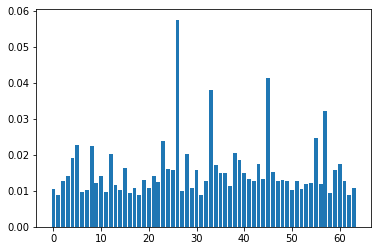

In [34]:
from matplotlib import pyplot
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [35]:
feat_importance=pd.DataFrame()
feat_importance

""


In [36]:
cols=X.columns

In [37]:
feat_importance['Column_Name']=cols
feat_importance
feat_importance['Importance']=importance
feat_importance
sort_feat=feat_importance.sort_values(by='Importance',axis=0,ascending=False)

In [38]:
top30=sort_feat.head(30)
top_features=top30.Column_Name
top_feature_name=list(top_features)

Select top 30 columns based on feature Importance as new X

In [39]:
X=X[top_feature_name]
y=y

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [41]:
Classifier = []
Accuracy=[]
RMSE =[]
Train_Score=[]
Test_Score=[]
Precision=[]
Recall=[]


In [42]:
MLAlgo(X_train,y_train,X_test,y_test)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
fescores = pd.DataFrame()  
fescores['Classifier']=Classifier
fescores['Accuracy']=Accuracy
fescores['RMSE']=RMSE
fescores['Train_Score']=Train_Score
fescores['Test_Score']=Test_Score
fescores['Precision']=Precision
fescores['Recall']=Recall
fescores

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
0,Logistic Regression,0.892178,0.328362,0.584961,0.892178,0.555059,0.585859
1,Decision Tree,0.900587,0.315297,1.000000,0.900587,0.628382,0.760913
2,Random Forest,0.958761,0.203075,1.000000,0.958761,0.784731,0.796922
3,KNN,0.753024,0.496967,0.911562,0.753024,0.517054,0.562994
4,Naive Bayes,0.070153,0.964286,0.504656,0.070153,0.480832,0.490878
5,Bagging,0.949891,0.223851,0.998972,0.949891,0.742170,0.786884
6,Extra Tree,0.930538,0.263557,1.000000,0.930538,0.656419,0.683329
7,Adaboost,0.857159,0.377943,0.877986,0.857159,0.592585,0.754133
8,Gradient Boost,0.757747,0.492192,0.776667,0.757747,0.557921,0.732887
9,XG Boost,0.867988,0.363335,0.895008,0.867988,0.608343,0.790957


In [44]:
fescores.sort_values(by='Accuracy',axis=0,ascending=False)

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
2,Random Forest,0.958761,0.203075,1.000000,0.958761,0.784731,0.796922
5,Bagging,0.949891,0.223851,0.998972,0.949891,0.742170,0.786884
6,Extra Tree,0.930538,0.263557,1.000000,0.930538,0.656419,0.683329
1,Decision Tree,0.900587,0.315297,1.000000,0.900587,0.628382,0.760913
0,Logistic Regression,0.892178,0.328362,0.584961,0.892178,0.555059,0.585859
9,XG Boost,0.867988,0.363335,0.895008,0.867988,0.608343,0.790957
7,Adaboost,0.857159,0.377943,0.877986,0.857159,0.592585,0.754133
8,Gradient Boost,0.757747,0.492192,0.776667,0.757747,0.557921,0.732887
3,KNN,0.753024,0.496967,0.911562,0.753024,0.517054,0.562994
4,Naive Bayes,0.070153,0.964286,0.504656,0.070153,0.480832,0.490878


In [45]:
X = consolidatedDfs.iloc[:,:-1]
y = consolidatedDfs.iloc[:,64]

# splitting the set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
#y_test

In [46]:
from sklearn.feature_selection import RFE
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
sel_rfe_rf = RFE(estimator=model, n_features_to_select=30, step=1)
X_train_rf = sel_rfe_rf.fit_transform(X_train, y_train)
print(sel_rfe_rf.get_support())
support= sel_rfe_rf.get_support()
df_feature_names=np.array(X.columns)
df_feature_names[support]

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[False False  True  True  True False False False  True False False False
 False False False  True False False  True False False  True False  True
  True  True  True False  True False False  True False  True  True  True
  True  True  True  True  True  True False  True False  True False False
 False False False False False False  True  True  True  True False  True
  True False False False]


array(['X3', 'X4', 'X5', 'X9', 'X16', 'X19', 'X22', 'X24', 'X25', 'X26',
       'X27', 'X29', 'X32', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39',
       'X40', 'X41', 'X42', 'X44', 'X46', 'X55', 'X56', 'X57', 'X58',
       'X60', 'X61'], dtype=object)

In [47]:
rfe_list=list(df_feature_names[support])
feat_impt=top_feature_name
# print ("The first list is : " + str(rfe_list)) 
# print ("The second list is : " + str(feat_impt)) 
  
# sorting both the lists 
rfe_list.sort() 
feat_impt.sort() 
  
# using == to check if  
# lists are equal 
if rfe_list == feat_impt: 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical")

The lists are not identical


Since features from feature Importance and rfe are different we perform modelling with rfe selected features again

In [48]:
X=X[rfe_list]
y=y

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [50]:
Classifier = []
Accuracy=[]
RMSE =[]
Train_Score=[]
Test_Score=[]
Precision=[]
Recall=[]


In [51]:
MLAlgo(X_train,y_train,X_test,y_test)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [52]:
rfescores = pd.DataFrame()  
rfescores['Classifier']=Classifier
rfescores['Accuracy']=Accuracy
rfescores['RMSE']=RMSE
rfescores['Train_Score']=Train_Score
rfescores['Test_Score']=Test_Score
rfescores['Precision']=Precision
rfescores['Recall']=Recall
rfescores

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
0,Logistic Regression,0.803824,0.442917,0.640518,0.803824,0.536081,0.613362
1,Decision Tree,0.899090,0.317663,1.000000,0.899090,0.630230,0.774074
2,Random Forest,0.955765,0.210320,1.000000,0.955765,0.769618,0.784613
3,KNN,0.741159,0.508764,0.901841,0.741159,0.512937,0.549232
4,Naive Bayes,0.075222,0.961654,0.507075,0.075222,0.494248,0.496767
5,Bagging,0.952079,0.218908,0.999017,0.952079,0.751571,0.780525
6,Extra Tree,0.930423,0.263775,1.000000,0.930423,0.652417,0.672537
7,Adaboost,0.843106,0.396099,0.861810,0.843106,0.586358,0.756388
8,Gradient Boost,0.777445,0.471757,0.785814,0.777445,0.563696,0.743263
9,XG Boost,0.878931,0.347950,0.895991,0.878931,0.621666,0.813892


In [53]:
rfescores.sort_values(by='Accuracy',axis=0,ascending=False)

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
2,Random Forest,0.955765,0.210320,1.000000,0.955765,0.769618,0.784613
5,Bagging,0.952079,0.218908,0.999017,0.952079,0.751571,0.780525
6,Extra Tree,0.930423,0.263775,1.000000,0.930423,0.652417,0.672537
1,Decision Tree,0.899090,0.317663,1.000000,0.899090,0.630230,0.774074
9,XG Boost,0.878931,0.347950,0.895991,0.878931,0.621666,0.813892
7,Adaboost,0.843106,0.396099,0.861810,0.843106,0.586358,0.756388
0,Logistic Regression,0.803824,0.442917,0.640518,0.803824,0.536081,0.613362
8,Gradient Boost,0.777445,0.471757,0.785814,0.777445,0.563696,0.743263
3,KNN,0.741159,0.508764,0.901841,0.741159,0.512937,0.549232
4,Naive Bayes,0.075222,0.961654,0.507075,0.075222,0.494248,0.496767


Though the changes are not very significant we see that models taken with top 30 features selected by feature importance have performed slightly better when we compare the third decimal place.

## Now we build models usin PCA, to check how the models behave when dimensionality is reduced

In [54]:
X = consolidatedDfs.iloc[:,:-1]
y = consolidatedDfs.iloc[:,64]

# splitting the set
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
#y_test

In [55]:
X=X[top_feature_name]
y=y

In [56]:
from sklearn.decomposition import PCA

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [58]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [59]:
Classifier = []
Accuracy=[]
RMSE =[]
Train_Score=[]
Test_Score=[]
Precision=[]
Recall=[]

In [60]:
MLAlgo(X_train, y_train, X_test, y_test)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
pcawscores = pd.DataFrame()  
pcawscores['Classifier']=Classifier
pcawscores['Accuracy']=Accuracy
pcawscores['RMSE']=RMSE
pcawscores['Train_Score']=Train_Score
pcawscores['Test_Score']=Test_Score
pcawscores['Precision']=Precision
pcawscores['Recall']=Recall
pcawscores

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
0,Logistic Regression,0.949199,0.225390,0.952482,0.949199,0.474600,0.500000
1,Decision Tree,0.916599,0.288791,1.000000,0.916599,0.566024,0.565457
2,Random Forest,0.948047,0.227931,0.999942,0.948047,0.691465,0.532660
3,KNN,0.947241,0.229693,0.953116,0.947241,0.500917,0.500042
4,Naive Bayes,0.065891,0.966493,0.064365,0.065891,0.492151,0.497218
5,Bagging,0.945052,0.234409,0.992109,0.945052,0.634279,0.531082
6,Extra Tree,0.944016,0.236610,1.000000,0.944016,0.562049,0.510147
7,Adaboost,0.948739,0.226410,0.951964,0.948739,0.599692,0.501903
8,Gradient Boost,0.949430,0.224878,0.952684,0.949430,0.974709,0.502268
9,XG Boost,0.949315,0.225134,0.952396,0.949315,0.974654,0.501134


In [62]:
pcawscores.sort_values(by='Accuracy',axis=0,ascending=False)

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
8,Gradient Boost,0.949430,0.224878,0.952684,0.949430,0.974709,0.502268
9,XG Boost,0.949315,0.225134,0.952396,0.949315,0.974654,0.501134
0,Logistic Regression,0.949199,0.225390,0.952482,0.949199,0.474600,0.500000
7,Adaboost,0.948739,0.226410,0.951964,0.948739,0.599692,0.501903
2,Random Forest,0.948047,0.227931,0.999942,0.948047,0.691465,0.532660
3,KNN,0.947241,0.229693,0.953116,0.947241,0.500917,0.500042
5,Bagging,0.945052,0.234409,0.992109,0.945052,0.634279,0.531082
6,Extra Tree,0.944016,0.236610,1.000000,0.944016,0.562049,0.510147
1,Decision Tree,0.916599,0.288791,1.000000,0.916599,0.566024,0.565457
4,Naive Bayes,0.065891,0.966493,0.064365,0.065891,0.492151,0.497218


## PCA with Scaling

In [63]:
X = consolidatedDfs.iloc[:,:-1]
y = consolidatedDfs.iloc[:,64]



In [64]:
X=X[top_feature_name]
y=y

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [67]:
Classifier = []
Accuracy=[]
RMSE =[]
Train_Score=[]
Test_Score=[]
Precision=[]
Recall=[]

In [68]:
MLAlgo(X_train, y_train, X_test, y_test)

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
pcascores = pd.DataFrame()  
pcascores['Classifier']=Classifier
pcascores['Accuracy']=Accuracy
pcascores['RMSE']=RMSE
pcascores['Train_Score']=Train_Score
pcascores['Test_Score']=Test_Score
pcascores['Precision']=Precision
pcascores['Recall']=Recall
pcascores

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
0,Logistic Regression,0.949084,0.225645,0.952454,0.949084,0.641315,0.501012
1,Decision Tree,0.900587,0.315297,1.000000,0.900587,0.515327,0.517317
2,Random Forest,0.949315,0.225134,0.999914,0.949315,0.744196,0.507572
3,KNN,0.946089,0.232187,0.954412,0.946089,0.592792,0.511239
4,Naive Bayes,0.947702,0.228688,0.951273,0.947702,0.553665,0.502430
5,Bagging,0.947817,0.228436,0.990583,0.947817,0.617837,0.507857
6,Extra Tree,0.947702,0.228688,1.000000,0.947702,0.620190,0.508869
7,Adaboost,0.948739,0.226410,0.952137,0.948739,0.599692,0.501903
8,Gradient Boost,0.948163,0.227678,0.952799,0.948163,0.551600,0.501600
9,XG Boost,0.949199,0.225390,0.952540,0.949199,0.724651,0.501073


In [70]:
pcascores.sort_values(by='Accuracy',axis=0,ascending=False)

,Classifier,Accuracy,RMSE,Train_Score,Test_Score,Precision,Recall
2,Random Forest,0.949315,0.225134,0.999914,0.949315,0.744196,0.507572
9,XG Boost,0.949199,0.225390,0.952540,0.949199,0.724651,0.501073
0,Logistic Regression,0.949084,0.225645,0.952454,0.949084,0.641315,0.501012
7,Adaboost,0.948739,0.226410,0.952137,0.948739,0.599692,0.501903
8,Gradient Boost,0.948163,0.227678,0.952799,0.948163,0.551600,0.501600
5,Bagging,0.947817,0.228436,0.990583,0.947817,0.617837,0.507857
4,Naive Bayes,0.947702,0.228688,0.951273,0.947702,0.553665,0.502430
6,Extra Tree,0.947702,0.228688,1.000000,0.947702,0.620190,0.508869
3,KNN,0.946089,0.232187,0.954412,0.946089,0.592792,0.511239
1,Decision Tree,0.900587,0.315297,1.000000,0.900587,0.515327,0.517317


We see the that XGBoost performs better than Logistic Regression in this case when PCA is done with scaling

# Cross Validation

In [71]:
X = consolidatedDfs.iloc[:,:-1]
y = consolidatedDfs.iloc[:,64]

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [73]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=5, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Logistic Regression','Decision Tree','KNN','Random Forest','Bagging','AdaBoost','Gradient Boost','XGBoost']
models=[GaussianNB(),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100),BaggingClassifier(),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=150),GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=2, max_depth=2, random_state=0),XGBClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Saibaba\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sil

,CV Mean,Std
Naive Bayes,0.071559,0.031497
Logistic Regression,0.882778,0.045655
Decision Tree,0.934524,0.019954
KNN,0.950973,0.034388
Random Forest,0.955351,0.033010
Bagging,0.959613,0.030786
AdaBoost,0.945559,0.027697
Gradient Boost,0.948923,0.032469
XGBoost,0.958023,0.031824
